<a href="https://colab.research.google.com/github/vcautela/DataCleaning_DataWrangling_Intro/blob/main/DataCleaning_DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn
!pip install cohere
!pip install openai
!pip install tiktoken
!pip install ydata_profiling
!pip install sidetable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [2]:
!pip install typing-extensions --upgrade

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
from ydata_profiling import ProfileReport
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [4]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale= .8,
    rc= {
        'figure.figsize': (12,8)
    }
)

In [5]:
#listar atributos e objeto (pulo Cainã)

def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [6]:
# dataset

df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [7]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# identificar valores duplicados

df.duplicated(keep=False).sum()

# "keep=False" considera todas as linhas duplicadas, inclusive a primeira

160

In [9]:
# linhas duplicadas.

df[df.duplicated(keep=False)]

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
4           0       3    male  35.0      0      0   8.0500        S   Third   
26          0       3    male   NaN      0      0   7.2250        C   Third   
28          1       3  female   NaN      0      0   7.8792        Q   Third   
29          0       3    male   NaN      0      0   7.8958        S   Third   
32          1       3  female   NaN      0      0   7.7500        Q   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male deck  embark_town alive  alone  
4      man        True  NaN  Southampton    no   True  
26     man        True  NaN    Cherbourg    no   True  
28   woman       False  NaN   Queenstown   yes   True  
29     man        True  NaN  Southampton    no   True  
32   woman       False  NaN   Queenstown   yes   True  
..     ...         ...  ...          ...   ...    ...  
870    man        True  NaN  Southampton    no   True  
877    man        True  NaN  Southampton    no   True  
878    man        True  NaN  Southampton    no   True  
884    man        True  NaN  Southampton    no   True  
886    man        True  NaN  Southampton    no   True  

[160 rows x 15 columns]

In [10]:
# quantos valores duplicados há para cada duplicata

(
  df.groupby(df.columns.to_list(), dropna=False)
  .size()
  .to_frame('n_duplicates')
  .query('n_duplicates>1')
  .sort_values('n_duplicates', ascending=False)
  .head()
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

In [11]:
# remover valores duplicados

df.drop_duplicates()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
885  woman       False  NaN   Queenstown    no  False  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[784 rows x 15 columns]

<h1>Contextualização teórica</h1>

<p>A maioria dos modelos de machine learning não consegue trabalhar com valores faltantes. Dessa forma, precisamos trata-los antes da aplicação dos modelos.
<p>as duas abordagens mais comuns para o tratamento de nulos são
<li>removê-los</li>
<li>imputá-los</li>
<p>para remover os nulos, podemos remover as linhas, perdendo a observação da linha como um todo, ou ainda removar uma variável(coluna) com muitos valores faltantes. perdendo assim por completo a variável.
<p> a remoção de nulos costuma ser viável quando temos um dataset grande com poucos valores nulos, dessa forma a remoçao dos valores nulos não afeta a acurácia do modelo que desejamos utilizar.

<h3>Como cientista de dados, não podemos simplesmente remover observações sem entender o motivo dos nulos:</h3>
<li> É decorrente de erro?</li>
<li> Pode significar algum valor? (neste caso faríamos uma imputação)</li>
<li> Existe algum padrão nestes valores com nulos? (exemplo, ausente apenas para determinado grupo)</li>

In [12]:
# Load titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [13]:
# shape retorna uma tupla com quantidade de linhas e quantidade de colunas
# realizando uma taxa de nulos

(df.isna().sum() / df.shape[0]).to_frame("missing_pct")

missing_pct
survived        0.000000
pclass          0.000000
sex             0.000000
age             0.198653
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.002245
class           0.000000
who             0.000000
adult_male      0.000000
deck            0.772166
embark_town     0.002245
alive           0.000000
alone           0.000000

In [14]:
# identificando nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values("missing_count", ascending=False)
)

df_missing.style.format('{:.2%}', subset='missing_pct')

In [15]:
df.stb.missing()

missing  total    percent
deck             688    891  77.216611
age              177    891  19.865320
embarked           2    891   0.224467
embark_town        2    891   0.224467
survived           0    891   0.000000
pclass             0    891   0.000000
sex                0    891   0.000000
sibsp              0    891   0.000000
parch              0    891   0.000000
fare               0    891   0.000000
class              0    891   0.000000
who                0    891   0.000000
adult_male         0    891   0.000000
alive              0    891   0.000000
alone              0    891   0.000000

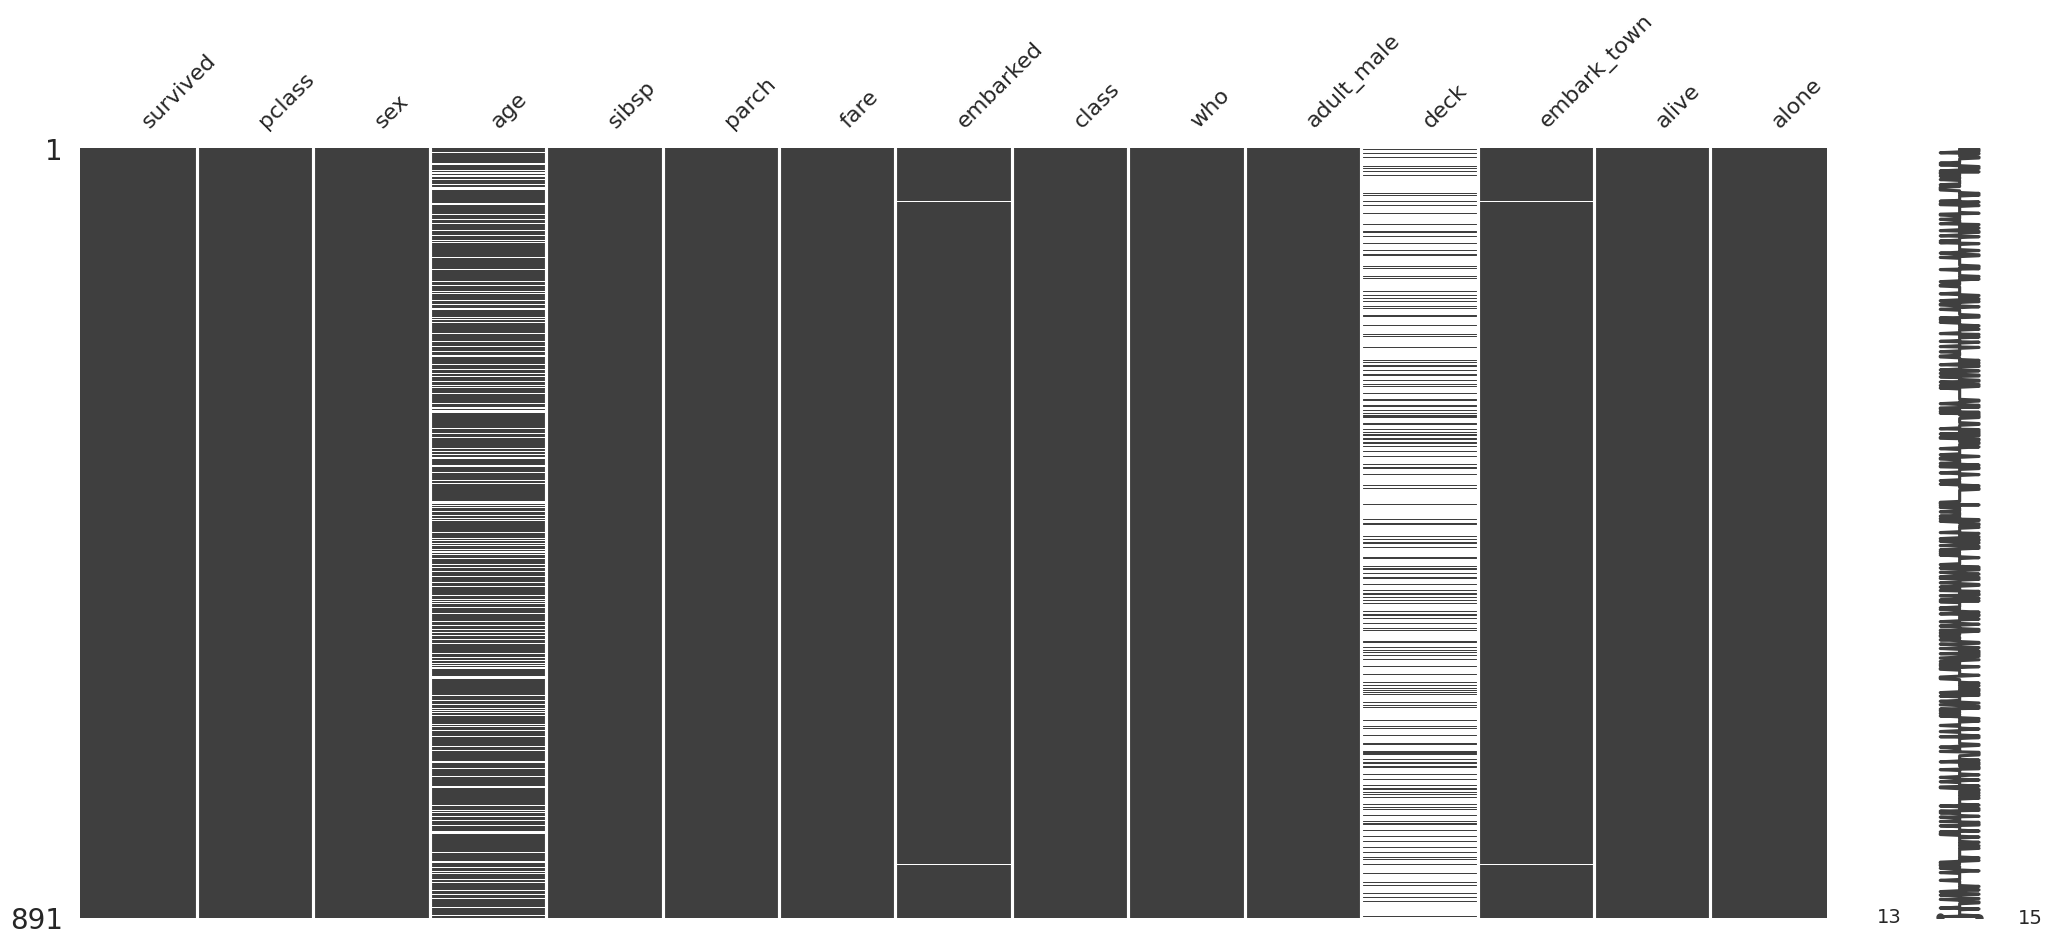

In [16]:
msno.matrix(df);

In [17]:
df[df.isna().any(axis=1)]

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
2           1       3  female  26.0      0      0   7.9250        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male   NaN      0      0   8.4583        Q   Third   
7           0       3    male   2.0      3      1  21.0750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
888         0       3  female   NaN      1      2  23.4500        S   Third   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
2    woman       False  NaN  Southampton   yes   True  
4      man        True  NaN  Southampton    no   True  
5      man        True  NaN   Queenstown    no   True  
7    child       False  NaN  Southampton    no  False  
..     ...         ...  ...          ...   ...    ...  
884    man        True  NaN  Southampton    no   True  
885  woman       False  NaN   Queenstown    no  False  
886    man        True  NaN  Southampton    no   True  
888  woman       False  NaN  Southampton    no  False  
890    man        True  NaN   Queenstown    no   True  

[709 rows x 15 columns]

In [18]:
df[df['embarked'].isna()]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True

In [19]:
# removendo a coluna 'deck'

df.drop(columns=['deck'])

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
1    woman       False    Cherbourg   yes  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
..     ...         ...          ...   ...    ...  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[891 rows x 14 columns]

In [20]:
  # Valor máximo de NAs permitido
max_nan_freq = .7
# Identificando as colunas
na_cols = df.isna().sum() / len(df)
cols2drop = na_cols[na_cols > max_nan_freq].index

In [21]:
# Dropando as colunas com muitos NAs
df.drop(columns=cols2drop)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
1    woman       False    Cherbourg   yes  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
..     ...         ...          ...   ...    ...  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[891 rows x 14 columns]

In [22]:
df.drop(columns=cols2drop, inplace=True)

df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

In [23]:
df.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male  embark_town alive  alone  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True

In [24]:
# imputando valores nos nulos com média/mediana/moda (observe a linha 888 como NaN acima)

df['age'].fillna(df.age.mean()).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, dtype: float64

In [25]:
# imputando valores núlos com valores passados, futuros

df.fillna(method='bfill').tail()

# para usar o valor da linha anterior, usar method='ffill'

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female  26.0      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male  embark_town alive  alone  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True

In [26]:
# imputando valores núlos a partir de interpolação (coloca-se um valor com base na reta da regressão linear.)

df['age'].interpolate().tail()

886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, dtype: float64

In [27]:
(
    df.assign(
        age_bfill = df.age.bfill(),
        age_ffill = df.age.ffill(),
        age_interpolate = df.age.interpolate()
    )
    .filter(like='age')
    .tail()
    .style.highlight_null('yellow')
)

In [28]:
# Imputando NAs por grupo
df.groupby('sex', group_keys=False)['age'].apply(lambda x: x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

Outliers são pontos muito distantes do centro de distribuição dos dados e impactam grande parte das análises e modelos de machine learning.

As causas de outlieres podem ser:
- Erro de mensuração/amostragem
- Outlier natural dos dados

Neste tópico aprenderemos como identificar e tratar outliers, que seja removendo-os ou aplicando transformação.

Cabe ressaltar que outliers naturais dos dados não devem ser removidos levianamente, ou seja, sem antes identificá-los e sem tentar entender seus motivos, se há padrões neste outliers. Uma vez identificado estes outliers e suas possíveis causas, e no caso de não haver problema/interesse em não considerá-los na análise, podemos removê-los.  

In [31]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()

(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

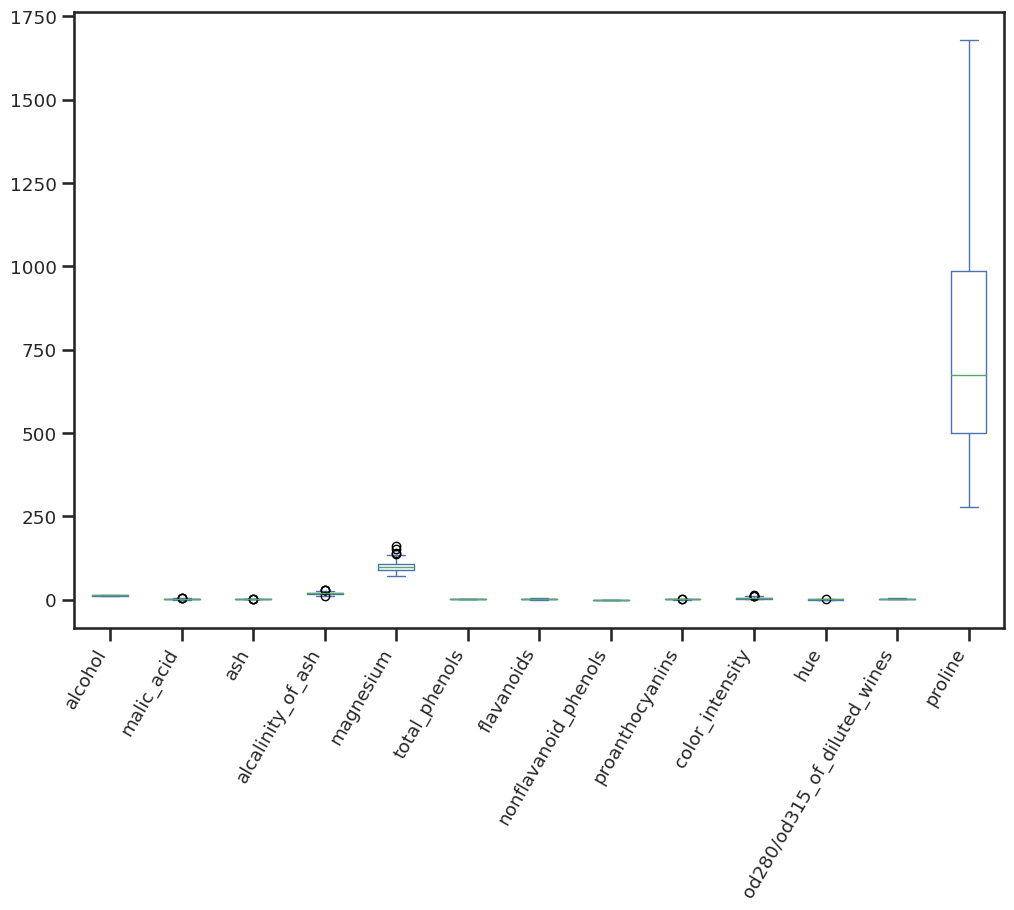

In [33]:
# identificando outliers pelo gráfico boxplot

df.plot.box()
plt.xticks(rotation=60, ha='right')

Conseguimos observar que há outliers em algumas variáveis, mas devido à diferença de escala entre as variáveis, fica difícil compará-las em um único plot.

Uma alternativa aqui seria plotar separadamente. Contudo, podemos optar também por padronizar estes dados apenas para visualização usando a função `scale` da importada da biblioteca `sklearn.preprocessing`:

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

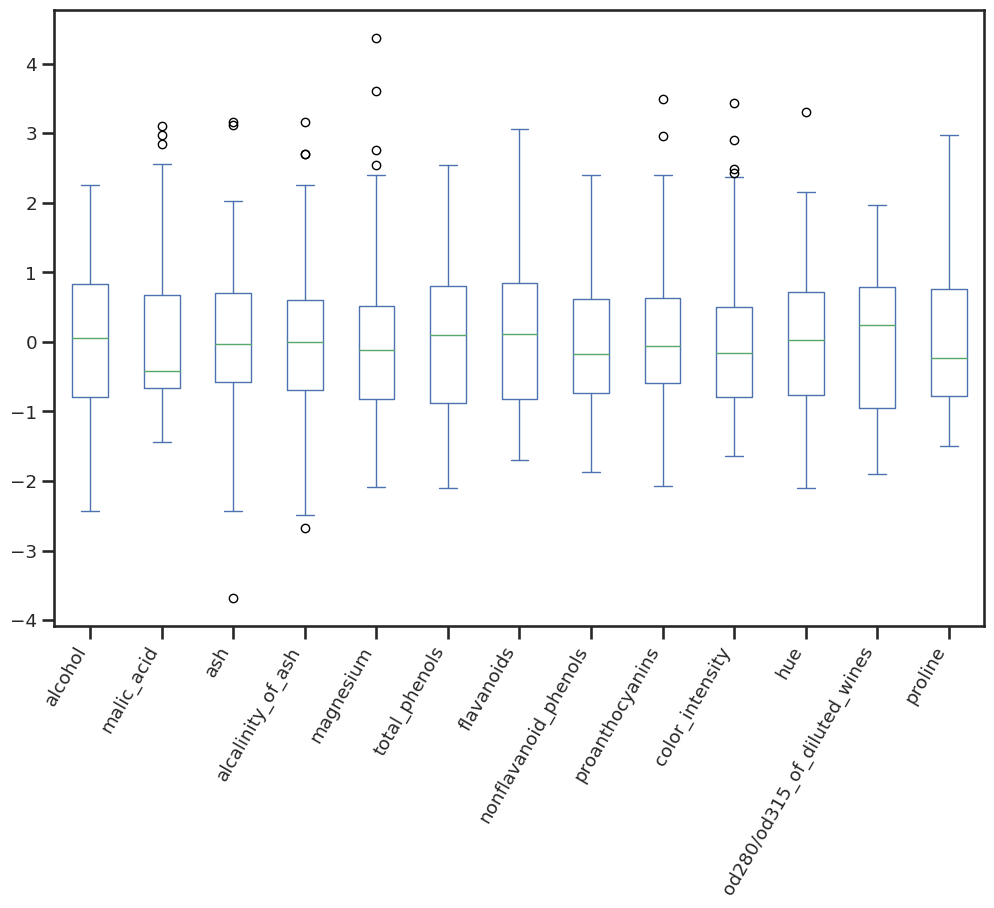

In [38]:
# padronizando os dados

df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right')

Verificamos que existem outliers, logo, o próximo passo seria identificá-los para verificar se faz sentido ou não. Para isso, discutiríamos com o time de negócios (neste caso, um especialista em vinhos).

Uma vez que este dataset está sendo utilizado para fins didáticos, vamos considerar inicialmente que podemos excluir estes dados, e mais adiante veremos alternativas para prosseguir com a análise mesmo com estes outliers.

Podemos identificar os outliers pelo método interquartil, utilizando a seguinte fórmula:

lower_outlier=Q1−1.5×IQR


upper_outlier=Q3+1.5×IQR

onde  Q1  represente o primeiro quartil,  Q3  o terceiro, e  IQR  o intervalo interquartil.

Segue abaixo uma possível implementação desta fórmula:

In [39]:
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [45]:
is_outlier(df.ash)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [46]:
#mostando a aplicação da função em uma dada coluna
is_outlier(df.ash).sum()

3

In [49]:
# mostrando a aplicação da função para todas as colunas
df.apply(is_outlier)

alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  total_phenols  \
0      False       False  False              False      False          False   
1      False       False  False              False      False          False   
2      False       False  False              False      False          False   
3      False       False  False              False      False          False   
4      False       False  False              False      False          False   
..       ...         ...    ...                ...        ...            ...   
173    False        True  False              False      False          False   
174    False       False  False              False      False          False   
175    False       False  False              False      False          False   
176    False       False  False              False      False          False   
177    False       False  False              False      False          False   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
0         False                 False            False            False   
1         False                 False            False            False   
2         False                 False            False            False   
3         False                 False            False            False   
4         False                 False            False            False   
..          ...                   ...              ...              ...   
173       False                 False            False            False   
174       False                 False            False            False   
175       False                 False            False            False   
176       False                 False            False            False   
177       False                 False            False            False   

       hue  od280/od315_of_diluted_wines  proline  
0    False                         False    False  
1    False                         False    False  
2    False                         False    False  
3    False                         False    False  
4    False                         False    False  
..     ...                           ...      ...  
173  False                         False    False  
174  False                         False    False  
175  False                         False    False  
176  False                         False    False  
177  False                         False    False  

[178 rows x 13 columns]

In [53]:
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [55]:
# removendo outliers
df[~df.apply(is_outlier).any(axis=1)]

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
172    14.16        2.51  2.48               20.0       91.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
172        0.70                  0.44             1.24             9.70  0.62   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
172                          1.71    660.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[161 rows x 13 columns]

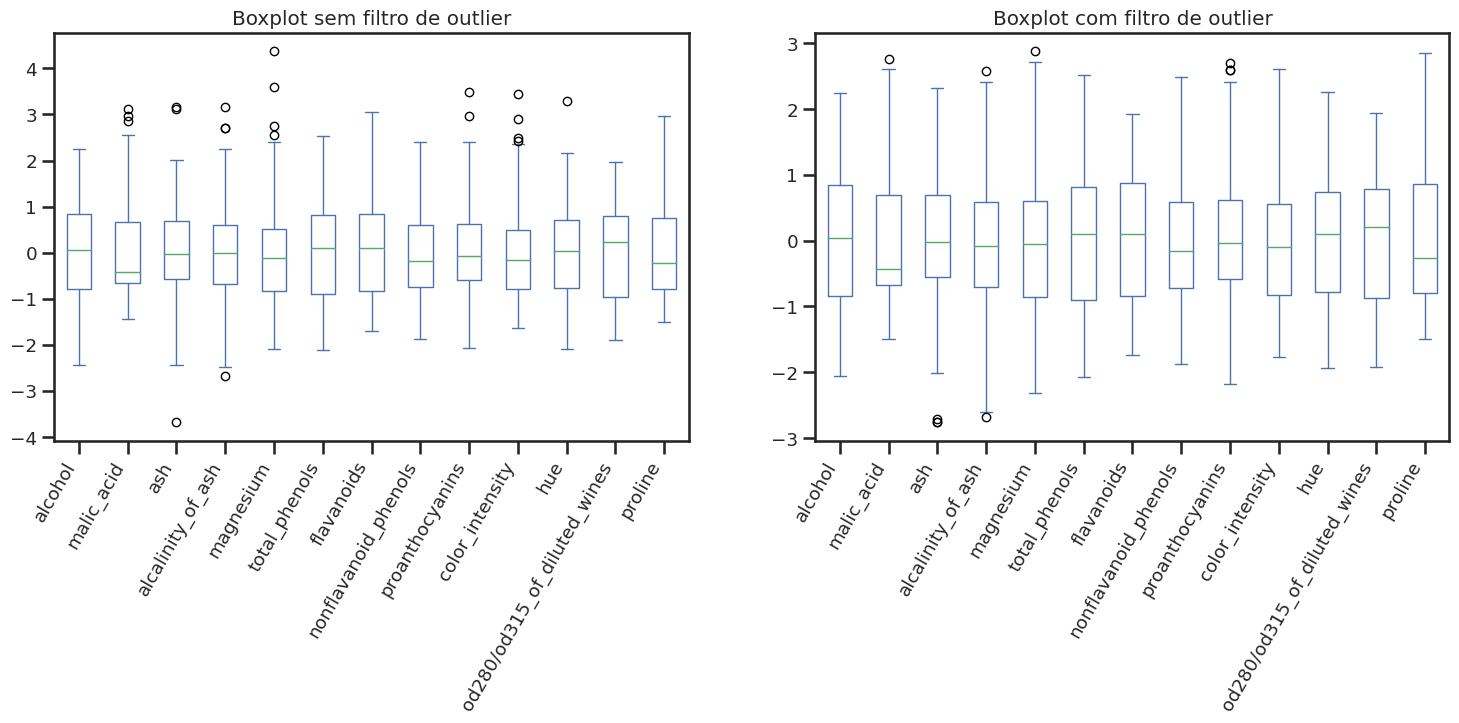

In [56]:
# Figura lado a lado dos dados originais e padronizados

df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

In [57]:
df_without_outliers.apply(is_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

bserve que, mesmo removendo os outliers, eles diminuem, mas não desapareceram! Por quê?

Ao adicionamos ou removemos valores acabamos modificando a distribuição dos dados, principalmente valores mais distantes do centro da distribuição. Por isso, a remoção de outliers não garante necessariamente que não terá mais outliers na nova distribuição.

Neste caso, por exemplo, valores que previamente não eram outliers passaram a ser. Contudo, tais valores não estão tão distantes como os outliers originais.



#### Z-score

Outro método para identificar e também remover outliers é através da padronização Z-score, em que a média dos valores fica em 0, e o desvio padrão em 1. Usualmente, filtramos valores acima e abaixo de 3 desvios padrões (para cima e para baixo, respectivamente).

Nós já utilizamos o Z-score

In [58]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

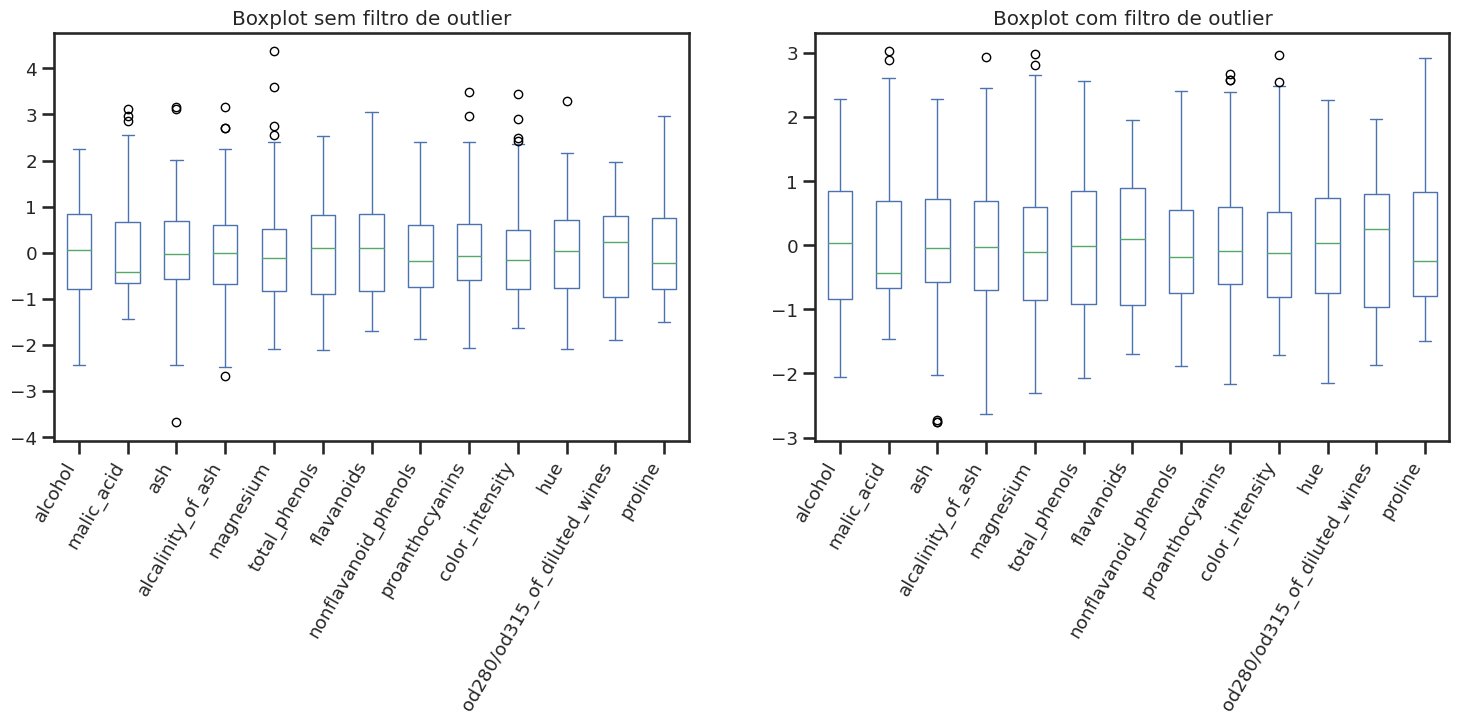

In [59]:
# Figura lado a lado dos dados originais e padronizados destacando 3 std

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()